In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.utils import all_estimators
from src.constants import MODEL_PATH
from src.data import Data
from src.evaluation import Evaluation
from src.explanation import report_model
from src.feature_engineering import FeatureEngineering, FeatureSelection
from src.genetic_algorithm import GeneticAlgorithm
from src.model import Model
from src.model_selection import ModelSelection
from src.preprocessing import DataPreprocessor

In [3]:
data = Data()
essays = data.load()

In [4]:
data_preprocessor = DataPreprocessor()
preprocessed_data = data_preprocessor.preprocess(essays)

In [5]:
feature_selection = FeatureSelection()
X, y = feature_selection.extract_features_and_labels(preprocessed_data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
feature_engineering = FeatureEngineering("one_hot_encoding")
feature_engineering.fit(X_train)
X_train_transformed = feature_engineering.transform(X_train)
X_test_transformed = feature_engineering.transform(X_test)

In [7]:
model_selection = ModelSelection()
model_selection.fit(X_train_transformed, y_train, X_test_transformed, y_test)

100%|██████████| 42/42 [00:01<00:00, 34.84it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000063 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 77
[LightGBM] [Info] Number of data points in the train set: 236, number of used features: 9
[LightGBM] [Info] Start training from score 45.533983
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

In [8]:
model = Model(model_class=model_selection.get_best_model_class())
model.fit(X_train_transformed, y_train)
model.save(MODEL_PATH)
predictions = model.predict(X_train_transformed)

Root Mean Squared Error: 9.50568163136667
Mean Absolute Error: 6.58896676595141
R2 Score: 0.9118018282972679


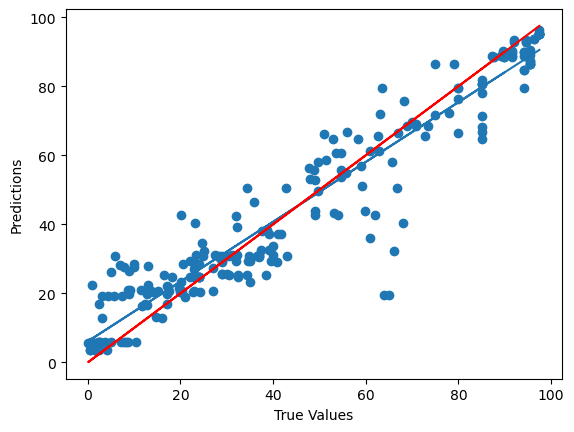

In [9]:
evaluation = Evaluation()
evaluation.report(y_train, predictions)

Root Mean Squared Error: 11.981280589481747
Mean Absolute Error: 8.687403854383057
R2 Score: 0.8437186343401837


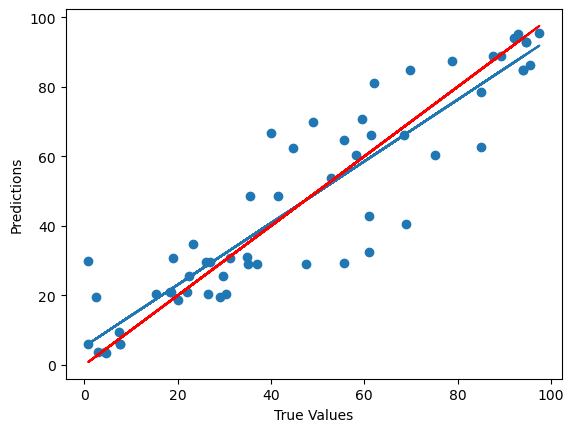

In [10]:
evaluation.report(y_test, model.predict(X_test_transformed))

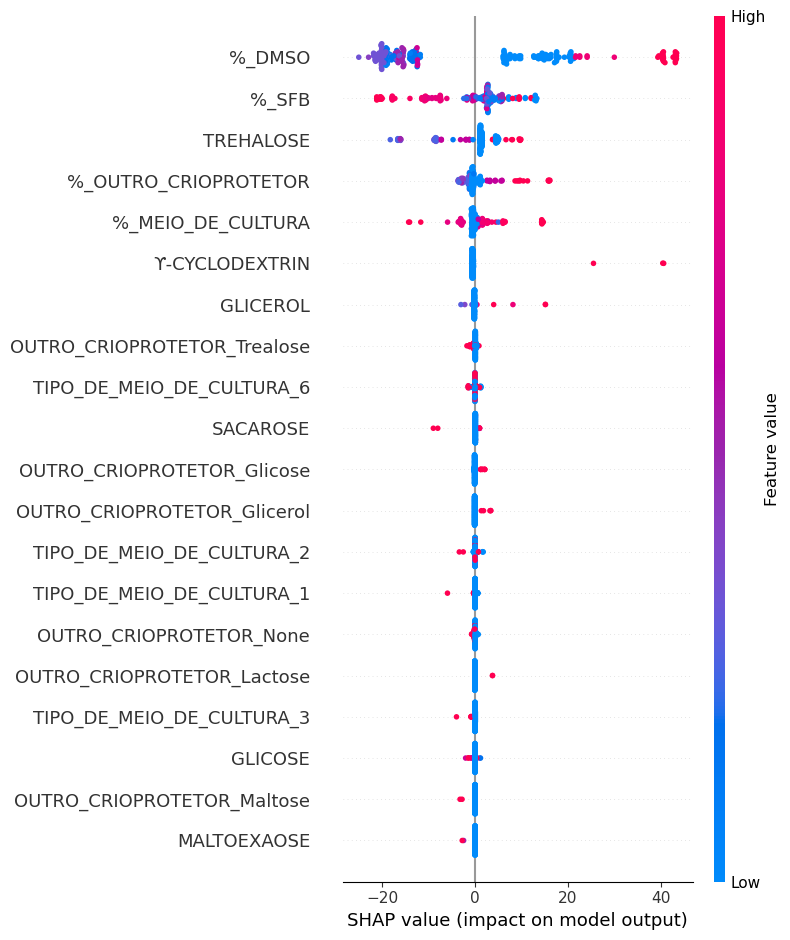

In [11]:
report_model(model, X_train_transformed)

In [12]:
genetic_algorithm = GeneticAlgorithm(
    X_train_transformed,
    model,
    population_size=236,
    max_generations=1000,
)
genetic_algorithm.fit()
genetic_algorithm.report_best_individual()

Best individual:
|                                   |   0 |
|:----------------------------------|----:|
| MALTOPENTAOSE                     |   0 |
| %_DMSO                            |  10 |
| %_MEIO_DE_CULTURA                 |   0 |
| TREHALOSE                         |  30 |
| Di-rhamnolipids                   |   0 |
| SACAROSE                          |   0 |
| MALTOHEPTAOSE                     |   0 |
| %_OUTRO_CRIOPROTETOR              |  30 |
| GLICOSE                           |   0 |
| MALTOSE                           |   0 |
| MALTOEXAOSE                       |   0 |
| MALTOTRIOSE                       |   0 |
| GLICEROL                          |   0 |
| MALTOTETRAOSE                     |   0 |
| %_SOLUÇÃO_TOTAL                   | 100 |
| %_SFB                             |  95 |
| DEXTRAN                           |   0 |
| ϒ-CYCLODEXTRIN                    |   0 |
| RAFFINOSE                         |   0 |
| LACTOSE                           |   0 |
| OUTRO_CRIOPRO

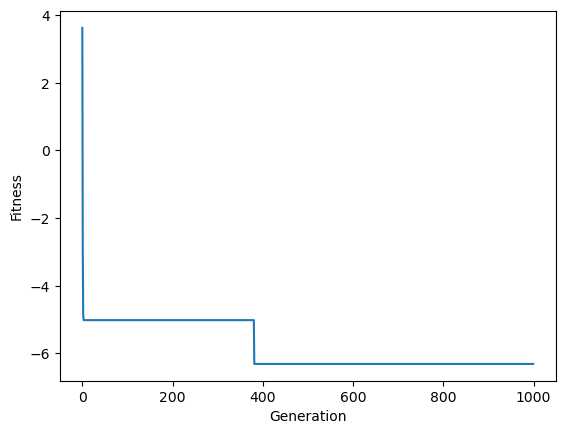

In [13]:
genetic_algorithm.show_history()